In [1]:
import numpy as np
import sys
sys.path.append('..')

### Modeling a Sensed Component
(1 component with 1 sensor)

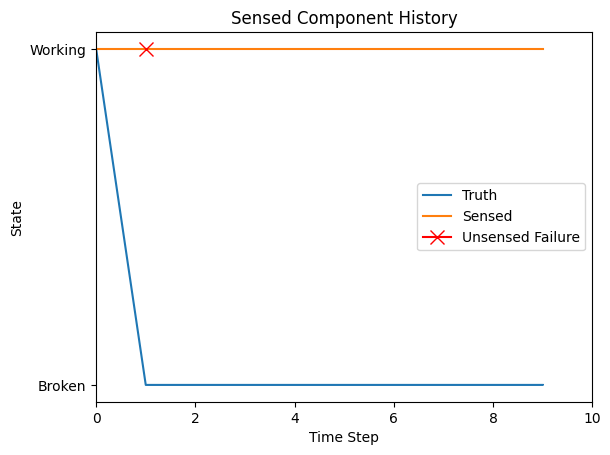

In [2]:
from shipClass.Sensor import Sensor
from shipClass.Component import Component
from shipClass.SensedComp import SensedComp

import numpy as np

states={0:'Broken' , 1:'Working'}
comp_transition_matrix = np.array([[1, 0],
                                    [0.25, 0.75]])
sensor_transition_matrix = np.array([[1, 0],
                                    [0.5, 0.5]])

c1 = Component("comp1", states, comp_transition_matrix)
s1 = Sensor("sensor1", states, sensor_transition_matrix)

sc1 = SensedComp(c1, s1)
sc1.simulate(10)
sc1.plotHistory()

### Testing a component with multiple sensors
(1 component with multiple attached sensors)

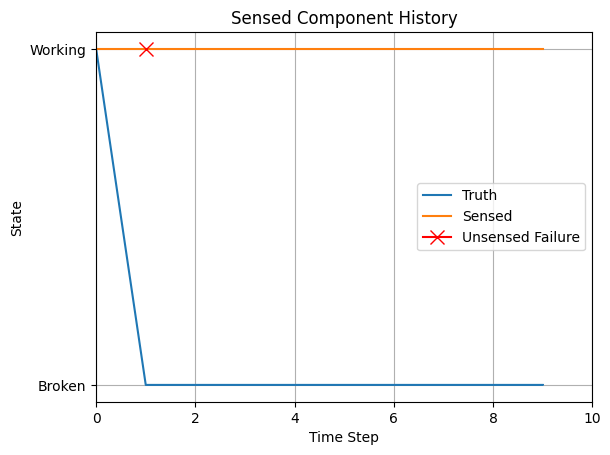

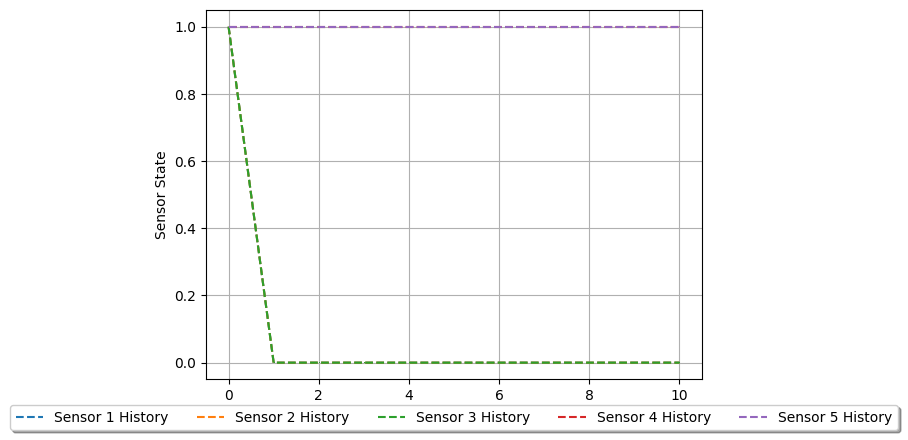

0
0
0
1
1


In [10]:
from shipClass.Sensor import Sensor
from shipClass.Component import Component
from shipClass.SensedComp import SensedComp


states={0:'Broken' , 1:'Working'}
comp_transition_matrix = np.array([[1, 0],
                                    [0.5, 0.5]])
sensor_transition_matrix_1 = np.array([[1, 0],
                                    [0.5, 0.5]])

sensor_transition_matrix_2 = np.array([[1, 0],
                                    [0.01, 0.99]])

c1 = Component("comp1", states, comp_transition_matrix)

# create multiple low reliability sensors
n_LR = 3
LR_sensors = []
for i in range(n_LR):
    s = Sensor("sensor" + str(i), states, sensor_transition_matrix_1)
    LR_sensors.append(s)

n_HR = 2
HR_sensors = []
for i in range(n_HR):
    s = Sensor("sensor" + str(i + n_LR), states, sensor_transition_matrix_2)
    HR_sensors.append(s)
    
sensors = LR_sensors + HR_sensors

# create a SensedComp with multiple sensors
sc1 = SensedComp(c1, sensors)
sc1.simulate(10)
sc1.plotHistory(True)
for i in range(len(sensors)):
    print(sc1.sensors[i].state)